In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

# Load the data

In [2]:
import datetime
from helpers import *

height, weight, gender = load_data(sub_sample=False, add_outlier=False)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

In [3]:
y.shape, tx.shape

((10000,), (10000, 2))

# 1 Computing the Cost Function

Fill in the `compute_loss` function below:
<a id='compute_loss'></a>


In [4]:
def compute_loss(y, tx, w):
    """Calculate the loss (mse)."""
    # If a is an N-D array and b is a 1-D array, it is a sum product over the last axis of a and b.
    e = y - np.dot(tx, w)
    loss = 1 / 2 * np.mean(e**2)
    return loss

# 2 Grid Search

Fill in the function `grid_search()` below:

In [5]:
def grid_search(y, tx, w0, w1):
    """Algorithm for grid search."""
    losses = np.zeros((len(w0), len(w1)))
    for id_row, weight_0 in enumerate(w0):
        for id_col, weight_1 in enumerate(w1):
            losses[id_row][id_col] = compute_loss(y, tx, np.array([weight_0, weight_1]))
    return losses

Let us play with the grid search demo now!

#### Grid spacing set to 10

Grid Search: loss*=42.42448314678248, w0*=66.66666666666669, w1*=16.666666666666686, execution time=0.007 seconds


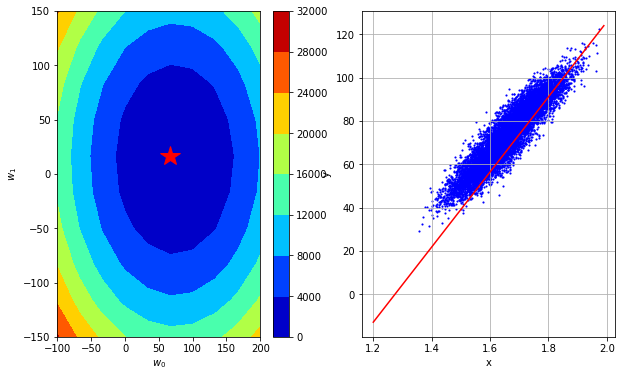

In [6]:
from grid_search import generate_w, get_best_parameters
from plots import grid_visualization

# Generate the grid of parameters to be swept
grid_w0, grid_w1 = generate_w(num_intervals=10)

# Start the grid search
start_time = datetime.datetime.now()
grid_losses = grid_search(y, tx, grid_w0, grid_w1)

# Select the best combinaison
loss_star, w0_star, w1_star = get_best_parameters(grid_w0, grid_w1, grid_losses)
end_time = datetime.datetime.now()
execution_time = (end_time - start_time).total_seconds()

# Print the results
print("Grid Search: loss*={l}, w0*={w0}, w1*={w1}, execution time={t:.3f} seconds".format(
      l=loss_star, w0=w0_star, w1=w1_star, t=execution_time))

# Plot the results
fig = grid_visualization(grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight)
fig.set_size_inches(10.0,6.0)
# fig.savefig("grid_plot")  # Optional saving

#### Grid spacing set to 50

Grid Search: loss*=18.793541019523236, w0*=71.42857142857142, w1*=15.306122448979579, execution time=0.137 seconds


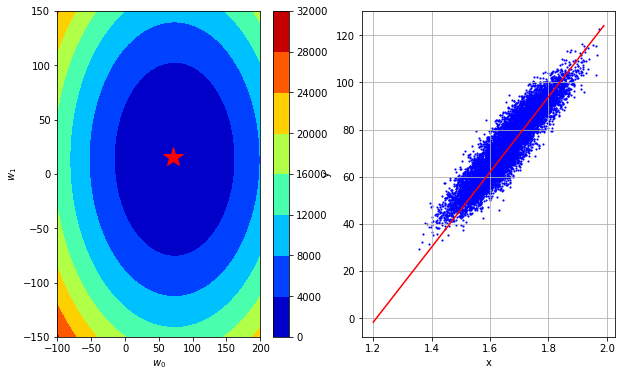

In [7]:
# Generate the grid of parameters to be swept
grid_w0, grid_w1 = generate_w(num_intervals=50)

# Start the grid search
start_time = datetime.datetime.now()
grid_losses = grid_search(y, tx, grid_w0, grid_w1)

# Select the best combinaison
loss_star, w0_star, w1_star = get_best_parameters(grid_w0, grid_w1, grid_losses)
end_time = datetime.datetime.now()
execution_time = (end_time - start_time).total_seconds()

# Print the results
print("Grid Search: loss*={l}, w0*={w0}, w1*={w1}, execution time={t:.3f} seconds".format(
      l=loss_star, w0=w0_star, w1=w1_star, t=execution_time))

# Plot the results
fig = grid_visualization(grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight)
fig.set_size_inches(10.0,6.0)
# fig.savefig("grid_plot")  # Optional saving

# 3 Gradient Descent

Again, please fill in the functions `compute_gradient` below:

In [8]:
def compute_gradient(y, tx, w):
    """Compute the gradient."""
    e = y - np.dot(tx, w)
    grad = -1  / len(e) * np.dot(tx.T, e)
    return grad

print(compute_gradient(y, tx, np.array([100, 20])))
print(compute_gradient(y, tx, np.array([50, 10])))

[26.706078    6.52028757]
[-23.293922    -3.47971243]


Please fill in the functions `gradient_descent` below:

In [9]:
def gradient_descent(y, tx, initial_w, max_iters, gamma):
    """Gradient descent algorithm."""
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        grad = compute_gradient(y, tx, w)
        loss = compute_loss(y, tx, w)
        # update w
        w = w - gamma * grad
        # store w and loss
        ws.append(w)
        losses.append(loss)
        print("Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))

    return losses, ws

Test your gradient descent function through gradient descent demo shown below:

In [10]:
# from gradient_descent import *
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.7

# Initialization
w_initial = np.array([100, 10])

# Start gradient descent.
start_time = datetime.datetime.now()
gradient_losses, gradient_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time))

Gradient Descent(0/49): loss=378.0473881987588, w0=81.30574540147364, w1=12.435798704492376
Gradient Descent(1/49): loss=48.0254228985231, w0=75.69746902191572, w1=13.166538315840057
Gradient Descent(2/49): loss=18.323446021501823, w0=74.01498610804835, w1=13.385760199244356
Gradient Descent(3/49): loss=15.650268102569916, w0=73.51024123388814, w1=13.451526764265642
Gradient Descent(4/49): loss=15.409682089866045, w0=73.35881777164008, w1=13.471256733772027
Gradient Descent(5/49): loss=15.388029348722696, w0=73.31339073296566, w1=13.477175724623942
Gradient Descent(6/49): loss=15.386080602019799, w0=73.29976262136333, w1=13.478951421879517
Gradient Descent(7/49): loss=15.385905214816535, w0=73.29567418788264, w1=13.47948413105619
Gradient Descent(8/49): loss=15.385889429968241, w0=73.29444765783843, w1=13.47964394380919
Gradient Descent(9/49): loss=15.385888009331897, w0=73.29407969882516, w1=13.479691887635092
Gradient Descent(10/49): loss=15.385887881474625, w0=73.29396931112117, w1=

In [11]:
# Time Visualization
from ipywidgets import IntSlider, interact

def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gradient_losses, gradient_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(value=51, min=1, max=len(gradient_ws)))

interactive(children=(IntSlider(value=51, description='n_iter', max=51, min=1), Output()), _dom_classes=('widg…

<function __main__.plot_figure(n_iter)>

# 4 Stochastic gradient descent

In [12]:
def compute_stoch_gradient(y, tx, w):
    """Compute a stochastic gradient from just few examples n and their corresponding y_n labels."""
    e = y - np.dot(tx, w)
    grad = -1 / len(e) * np.dot(tx.T, e)
    return grad


def stochastic_gradient_descent(
        y, tx, initial_w, batch_size, max_iters, gamma):
    """Stochastic gradient descent algorithm."""
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        # get a random minibatch of data
        for minibatch_y, minibatch_x in batch_iter(y, tx, batch_size):
            grad = compute_stoch_gradient(minibatch_y, minibatch_x, w)
            loss = compute_loss(minibatch_y, minibatch_x, w)
            w = w - gamma * grad
            # store w and loss
            ws.append(w)
            losses.append(loss)
        print("Stochastic Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
            bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))
        
    return losses, ws

In [13]:
# from stochastic_gradient_descent import *

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.7
batch_size = 1

# Initialization
w_initial = np.array([0, 0])

# Start SGD.
start_time = datetime.datetime.now()
sgd_losses, sgd_ws = stochastic_gradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SGD: execution time={t:.3f} seconds".format(t=exection_time))

Stochastic Gradient Descent(0/49): loss=2068.0556978756676, w0=45.018824772734284, w1=-23.266618677043734
Stochastic Gradient Descent(1/49): loss=2241.36244832171, w0=91.88603291825193, w1=23.29730980272679
Stochastic Gradient Descent(2/49): loss=0.21041041226403412, w0=92.34012784667412, w1=22.816596032934335
Stochastic Gradient Descent(3/49): loss=497.99869753683396, w0=70.248529362497, w1=9.845089193958776
Stochastic Gradient Descent(4/49): loss=33.7854590591051, w0=64.49442214435072, w1=15.303286541762965
Stochastic Gradient Descent(5/49): loss=15.139434521196447, w0=68.34625882712591, w1=20.785411388634355
Stochastic Gradient Descent(6/49): loss=90.48636402297338, w0=58.92943150883479, w1=17.250395373329646
Stochastic Gradient Descent(7/49): loss=209.15999335619347, w0=73.24644214266019, w1=32.562235653030434
Stochastic Gradient Descent(8/49): loss=75.05901755883312, w0=81.82302871353187, w1=27.141060365995553
Stochastic Gradient Descent(9/49): loss=15.535633511064677, w0=85.72494

In [14]:
# Time Visualization
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        sgd_losses, sgd_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(value=51, min=1, max=len(gradient_ws)))

interactive(children=(IntSlider(value=51, description='n_iter', max=51, min=1), Output()), _dom_classes=('widg…

<function __main__.plot_figure(n_iter)>

# 5 Effect of Outliers and MAE Cost Function, and Subgradient Descent

### Exercise 5

Load and plot data containing outliers

#### setting sub_sample=True

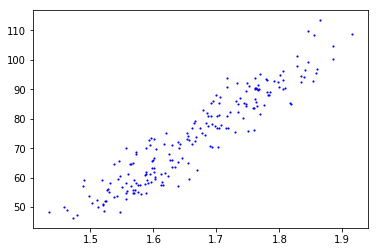

In [15]:
height, weight, gender = load_data(sub_sample=True, add_outlier=False)
plt.scatter(height, weight, marker=".", color='b', s=5)

x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

In [16]:
# from gradient_descent import *
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.7

# Initialization
w_initial = np.array([0, 0])

# Start gradient descent.
start_time = datetime.datetime.now()
gradient_losses, gradient_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time))

Gradient Descent(0/49): loss=2829.2722244384163, w0=51.54259072181176, w1=10.132993413506084
Gradient Descent(1/49): loss=267.0500258779429, w0=67.0053679383553, w1=13.172891437557825
Gradient Descent(2/49): loss=36.45002800750046, w0=71.64420110331838, w1=14.084860844773322
Gradient Descent(3/49): loss=15.696028199160635, w0=73.03585105280729, w1=14.358451666937965
Gradient Descent(4/49): loss=13.828168216410077, w0=73.45334603765397, w1=14.440528913587356
Gradient Descent(5/49): loss=13.660060817962522, w0=73.57859453310797, w1=14.46515208758217
Gradient Descent(6/49): loss=13.644931152102242, w0=73.61616908174418, w1=14.472539039780616
Gradient Descent(7/49): loss=13.643569482174817, w0=73.62744144633503, w1=14.474755125440149
Gradient Descent(8/49): loss=13.643446931881353, w0=73.63082315571229, w1=14.47541995113801
Gradient Descent(9/49): loss=13.643435902354941, w0=73.63183766852546, w1=14.475619398847368
Gradient Descent(10/49): loss=13.64343490969756, w0=73.63214202236942, w1=1

In [17]:
# Time Visualization
from ipywidgets import IntSlider, interact

def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gradient_losses, gradient_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(value=51, min=1, max=len(gradient_ws)))

interactive(children=(IntSlider(value=51, description='n_iter', max=51, min=1), Output()), _dom_classes=('widg…

<function __main__.plot_figure(n_iter)>

#### setting add_outlier=True

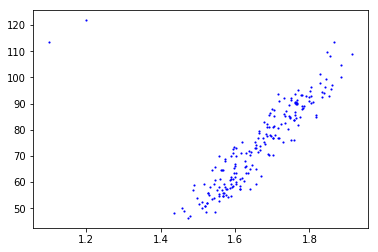

In [18]:
height, weight, gender = load_data(sub_sample=True, add_outlier=True)
plt.scatter(height, weight, marker=".", color='b', s=5)

x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

In [19]:
# from gradient_descent import *
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.7

# Initialization
w_initial = np.array([0, 0])

# Start gradient descent.
start_time = datetime.datetime.now()
gradient_losses, gradient_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time))

Gradient Descent(0/49): loss=2869.8351145358524, w0=51.84746409844842, w1=7.7244264061924195
Gradient Descent(1/49): loss=318.2821247015965, w0=67.40170332798297, w1=10.041754328050114
Gradient Descent(2/49): loss=88.6423556165128, w0=72.06797509684336, w1=10.736952704607411
Gradient Descent(3/49): loss=67.9747763988552, w0=73.46785662750146, w1=10.945512217574597
Gradient Descent(4/49): loss=66.11469426926604, w0=73.88782108669889, w1=11.00808007146475
Gradient Descent(5/49): loss=65.94728687760302, w0=74.01381042445813, w1=11.026850427631798
Gradient Descent(6/49): loss=65.93222021235334, w0=74.0516072257859, w1=11.032481534481914
Gradient Descent(7/49): loss=65.93086421248087, w0=74.06294626618423, w1=11.034170866536945
Gradient Descent(8/49): loss=65.93074217249236, w0=74.06634797830372, w1=11.034677666153454
Gradient Descent(9/49): loss=65.93073118889338, w0=74.06736849193958, w1=11.034829706038408
Gradient Descent(10/49): loss=65.93073020036948, w0=74.06767464603033, w1=11.034875

In [20]:
# Time Visualization
from ipywidgets import IntSlider, interact

def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gradient_losses, gradient_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(value=51, min=1, max=len(gradient_ws)))

interactive(children=(IntSlider(value=51, description='n_iter', max=51, min=1), Output()), _dom_classes=('widg…

<function __main__.plot_figure(n_iter)>

### Exercise 6

Modify the function `compute_loss(y, tx, w)` for the Mean Absolute Error cost function [here](#compute_loss)

In [21]:
def compute_loss(y, tx, w):
    """Calculate the loss (mae)."""
    e = y - np.dot(tx, w)
    loss = np.mean(np.abs(e))
    return loss

In [22]:
def compute_gradient(y, tx, w):
    """Compute the gradient."""
    e = y - np.dot(tx, w)
    grad = -1 / len(e) * np.dot(tx.T, e / np.abs(e))
    return grad

print(compute_gradient(y, tx, np.array([100, 20])))
print(compute_gradient(y, tx, np.array([50, 10])))

[0.98019802 0.08689453]
[-1.0000000e+00 -8.7278919e-16]


#### 6-Gradient Descent

In [23]:
def gradient_descent(y, tx, initial_w, max_iters, gamma):
    """Gradient descent algorithm."""
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        grad = compute_gradient(y, tx, w)
        loss = compute_loss(y, tx, w)
        w = w - gamma * grad
        # store w and loss
        ws.append(w)
        losses.append(loss)
        print("Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))

    return losses, ws

In [24]:
# from gradient_descent import *
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.7

# Initialization
w_initial = np.array([100, 10])

# Start gradient descent.
start_time = datetime.datetime.now()
gradient_losses, gradient_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time))

Gradient Descent(0/49): loss=27.150073031481213, w0=99.31386138613861, w1=9.939173827975457
Gradient Descent(1/49): loss=26.472235859145798, w0=98.62772277227722, w1=9.878347655950915
Gradient Descent(2/49): loss=25.7943986868104, w0=97.94158415841584, w1=9.817521483926372
Gradient Descent(3/49): loss=25.116561514474988, w0=97.25544554455445, w1=9.75669531190183
Gradient Descent(4/49): loss=24.438724342139587, w0=96.56930693069306, w1=9.695869139877287
Gradient Descent(5/49): loss=23.760887169804175, w0=95.88316831683167, w1=9.635042967852744
Gradient Descent(6/49): loss=23.08833776503491, w0=95.20396039603959, w1=9.586487254253727
Gradient Descent(7/49): loss=22.42593625504947, w0=94.52475247524751, w1=9.53793154065471
Gradient Descent(8/49): loss=21.76353474506402, w0=93.84554455445543, w1=9.489375827055694
Gradient Descent(9/49): loss=21.10827767842607, w0=93.17326732673266, w1=9.451960014052027
Gradient Descent(10/49): loss=20.46062537274415, w0=92.50099009900988, w1=9.414544201048

In [25]:
# Time Visualization
from ipywidgets import IntSlider, interact

def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gradient_losses, gradient_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(value=51, min=1, max=len(gradient_ws)))

interactive(children=(IntSlider(value=51, description='n_iter', max=51, min=1), Output()), _dom_classes=('widg…

<function __main__.plot_figure(n_iter)>

#### 6-Stochastic Gradient Descent

In [26]:
def compute_stoch_gradient(y, tx, w):
    """Compute a stochastic gradient from just few examples n and their corresponding y_n labels."""
    e = y - np.dot(tx, w)
    grad = -1 / len(e) * np.dot(tx.T, e / np.abs(e))
    return grad


def stochastic_gradient_descent(
        y, tx, initial_w, batch_size, max_iters, gamma):
    """Stochastic gradient descent algorithm."""
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        for minibatch_y, minibatch_x in batch_iter(y, tx, batch_size):
            grad = compute_stoch_gradient(minibatch_y, minibatch_x, w)
            loss = compute_loss(minibatch_y, minibatch_x, w)
            w = w - gamma * grad
            # store w and loss
            ws.append(w)
            losses.append(loss)
        print("Stochastic Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
            bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))
        
    return losses, ws

In [27]:
# from stochastic_gradient_descent import *

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.7
batch_size = 1

# Initialization
w_initial = np.array([0, 0])

# Start SGD.
start_time = datetime.datetime.now()
sgd_losses, sgd_ws = stochastic_gradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SGD: execution time={t:.3f} seconds".format(t=exection_time))

Stochastic Gradient Descent(0/49): loss=94.78696143791365, w0=0.7, w1=0.8562220525045381
Stochastic Gradient Descent(1/49): loss=88.97748655956622, w0=1.4, w1=1.4708830336349248
Stochastic Gradient Descent(2/49): loss=73.39214440741584, w0=2.0999999999999996, w1=2.076286185078909
Stochastic Gradient Descent(3/49): loss=69.1488626658418, w0=2.8, w1=1.6459545966181732
Stochastic Gradient Descent(4/49): loss=79.4539576396331, w0=3.5, w1=2.2382725578863516
Stochastic Gradient Descent(5/49): loss=83.22237622492109, w0=4.2, w1=2.999629508505421
Stochastic Gradient Descent(6/49): loss=61.48410826221593, w0=4.9, w1=2.8791249570263786
Stochastic Gradient Descent(7/49): loss=52.902504819067346, w0=5.6000000000000005, w1=1.9023274780844597
Stochastic Gradient Descent(8/49): loss=92.98366353208893, w0=6.300000000000001, w1=2.9150058194372264
Stochastic Gradient Descent(9/49): loss=85.6766028793437, w0=7.000000000000001, w1=4.121022109207673
Stochastic Gradient Descent(10/49): loss=57.3408046100783

In [28]:
# Time Visualization
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        sgd_losses, sgd_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(value=51, min=1, max=len(gradient_ws)))

interactive(children=(IntSlider(value=51, description='n_iter', max=51, min=1), Output()), _dom_classes=('widg…

<function __main__.plot_figure(n_iter)>